### 목차
- 이진 탐색 트리
- 힙

# BST(Binary Search Tree) 자료구조
- Data들을 빠르게 검색할 수 있도록 체계적으로 저장을 해두고, 최대 O(log n)의 빠른 속도로 값을 검색할 수 있는 자료 구조
- 빠르게 검색될 수 있도록 특정 규칙을 갖는 이진트리 형태로 값을 저장해둔다.

### 리스트 vs BST
- BST는 리스트보다 더 빠른 삽입/삭제/탐색이 가능하다
- 리스트 성능 : 삽입/삭제/탐색 O(n) (맨 끝 삽입과 삭제는 O(1))
- BST 성능 : 삽입/삭제/탐색 평균 O(logN) 

### 동작 원리
1. 삽입
    1) 처음 등장하는 값은 root에 저장된다.
    2) 두번째 값이 기존 값보다 크면 오른쪽에, 작으면 왼쪽 자식 노드에 배정된다
    3) 그 뒤 루트부터 시작하여 자기 자리를 찾아 배치된다.
2. 순회
    - BST에서 DFS 중위순회를 하게 되면 Key 값이 작은 순서대로 탐색이 가능하다


### 성능
- 탐색, 삽입, 삭제 시간은 트리의 높이만큼 시간이 걸린다(O(h))
- 이진트리가 균형적으로 생성되어 있는 경우 O(logN)
- 편향이진트리의 경우 O(n) (최악의 경우)


## 이진 탐색 트리 정리
- 탐색 작업을 효율적으로 하기 위한 자료 구조
- 모든 원소는 서로 다른 유일한 키를 갖는다
- 왼쪽 서브트리 < 루트 노드 < 오른쪽 서브 트리
- 왼쪽 서브트리와 오른쪽 서브트리도 이진탐색트리다.
- 중위순회하면 오름차순으로 정렬된 값을 얻을 수 있다.

In [ ]:
'''
7
3 5 1 2 7 4 -5
'''

# 연결 리스트로 구현하기 위해 data, 좌/우 노드를 연결할 수 있도록 선언
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None


class BinarySearchTree:
    # 이진탐색트리에서 관리해야 할 변수는 root 하나 뿐
    # 삽입, 탐색, 삭제 등 모든 연산은 root 에서부터 시작
    def __init__(self):
        self.root = None

    # 삽입 연산
    def insert(self, key):
        # root 가 없다면 그냥 삽입
        if self.root is None:
            self.root = Node(key)
        # 데이터가 있다면, 위치를 찾아야 한다.
        else:
            self._insert(self.root, key)

    # 실제로 삽입할 위치를 찾아서 삽입
    # node: 현재 탐색중인 노드 / key: 삽입하고자 하는 값 
    def _insert(self, node, key):
        # 현재노드보다 작으면 왼쪽을 탐색
        if key < node.key:
            # 왼쪽에 노드가 없다 == 삽입 가능한 위치
            if node.left is None:
                node.left = Node(key)
            # 왼쪽에 노드가 있으면, 해당 노드를 기준으로 다시 탐색
            else:
                self._insert(node.left, key)
        # 현재노드보다 크면 오른쪽을 탐색
        else:
            # 오른쪽에 노드가 없다 == 삽입 가능한 위치
            if node.right is None:
                node.right = Node(key)
            # 오른쪽에 노드가 있으면, 해당 노드를 기준으로 다시 탐색
            else:
                self._insert(node.right, key)

    # 탐색 연산
    def search(self, key):
        return self._search(self.root, key)

    # 재귀적으로 노드를 탐색하는 메서드
    def _search(self, node, key):
        # node is None: 끝까지 내려간 상태 -> 더 이상 내려갈 수 없다
        # node.key == key: 발견함
        if node is None or node.key == key:
            return node
        # 현재 노드보다 작으면, 왼쪽을 추가로 탐색
        if key < node.key:
            return self._search(node.left, key)
        # 현재 노드보다 크다면, 오른쪽을 추가로 탐색
        else:
            return self._search(node.right, key)

    # 중위 순회
    def inorder_traversal(self):
        self._inorder_traversal(self.root)

    # 재귀적으로 중위 순회해주는 메서드
    def _inorder_traversal(self, node):
        if node:
            self._inorder_traversal(node.left)
            print(node.key, end=' ')
            self._inorder_traversal(node.right)

N = int(input())
arr = list(map(int, input().split()))

bst = BinarySearchTree()

for num in arr:
    bst.insert(num)

print("중위 순회 결과:", end=' ')
bst.inorder_traversal()  # 중위 순회: -5 1 2 3 4 5 7

# 탐색 예제
key = 5
result = bst.search(key)
if result:
    print(f"\n키 {key} 찾음.")
else:
    print(f"\n키 {key} 못 찾음.")


# 힙(heap)
- 완전이진트리에 있는 노드 중에서 키값이 가장 큰 노드나 키값이 가장 작은 노드를 찾기 위해서 만든 자료구조
- 최대 힙(max heap)
    - 키값이 가장 큰 노드를 찾기 위한 완전이진트리
    - 부모노드의 키값 > 자식노드의 키값
    - 루트 노드 : 키값이 가장 큰 노드
- 최소 힙(min heap)
    - 키값이 가장 작은 노드를 찾기 위한 완전이진트리
    - 부모노드의 키값 < 자식노드의 키값
    - 루트 노드 : 키값이 가장 작은 노드
![힙이 아닌 이진트리의 예.png](<attachment:힙이 아닌 이진트리의 예.png>)
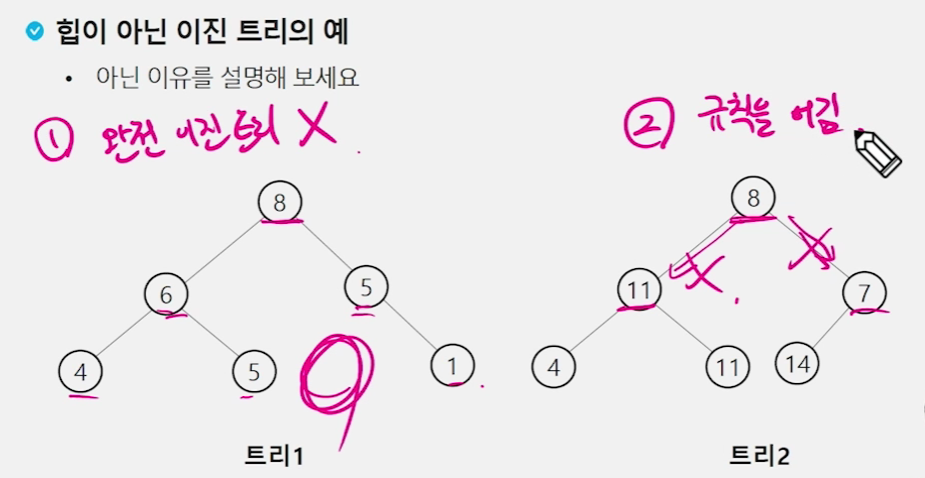

### 힙 연산
- 삽입
    1. 일단 맨 뒤에 삽입
    2. 부모와 비교하여 내 위치를 찾아감(비교, swap)
    - 힙의 종류에 따라 최대값 혹은 최소값을 구할 수 있다
- 삭제
    - 루트 노드의 원소만을 삭제 할 수 있다
    - 루트 노드의 원소를 삭제하여 반환한다
    - 힙의 종류에 따라 최대값 혹은 최소값을 구할 수 있다
    - 순서
    1. 루트 노드에 마지막 노드 값 복사
    2. 마지막 노드 삭제
    3. 비교하며 자리 바꾸기(최대힙이라면 좌우 자식노드 중 더 큰값과 바꾸기)

### 힙을 이용한 우선순위 큐
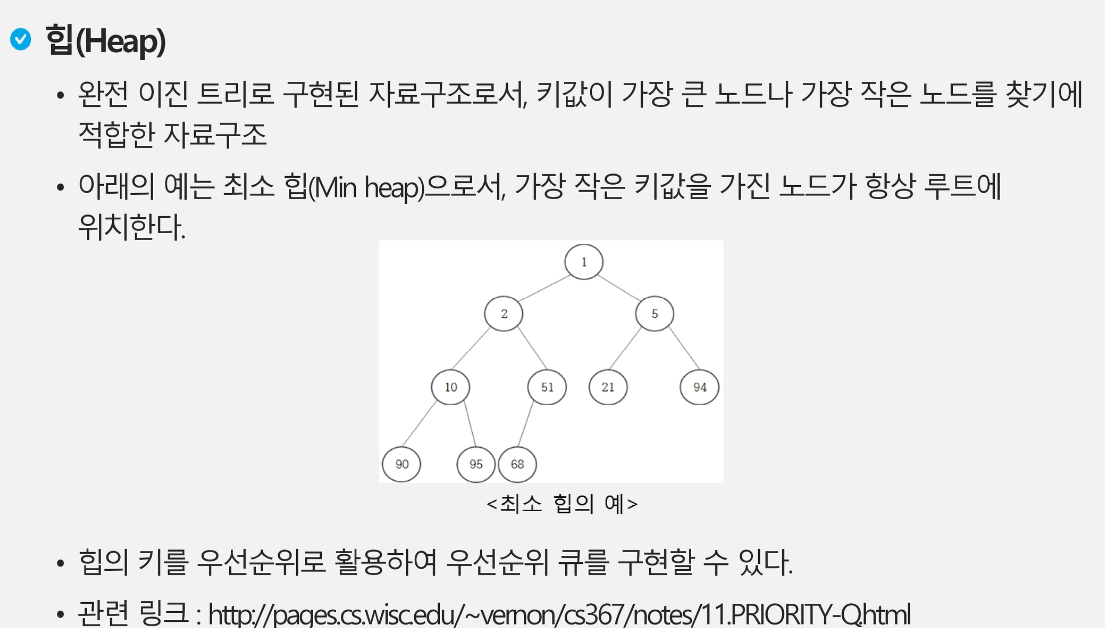

In [ ]:
# 최대 힙

'''
7
20 15 19 4 13 11 17

7
20 15 19 4 13 11 23
'''


# 최대힙
def enq(n):
    global last
    # 마지막에 삽입

    last += 1   # 마지막 노드 추가(완전이진트리 유지), len 연산 대신
    h[last] = n # 마지막 노드에 데이터 삽입
    c = last    # 부모>자식 비교를 위해
    p = c//2    # 부모번호 계산
    
    # 자리 찾아가기
    while p >= 1 and h[p] < h[c]:   # 부모가 있는데, 더 작으면 (즉 루트노드이거나 제자리를 찾은 경우)
        h[p], h[c] = h[c], h[p]  # 교환
        c = p
        p = c//2


def deq():
    global last
    tmp = h[1]   # 루트의 키값 보관
    h[1] = h[last]
    last -= 1
    p = 1           # 새로 옮긴 루트
    c = p*2
    while c <= last:  # 자식이 있으면
        # 오른쪽과 왼쪽 비교
        if c+1 <= last and h[c] < h[c+1]: # 오른쪽자식이 있고 더 크면
            c += 1
        # 자리 비교 후 swap
        if h[p] < h[c]:
            h[p], h[c] = h[c], h[p]
            p = c
            c = p*2
        # 부모가 더 작은경우가 없으면 중단
        else:
            break
    return tmp


N = int(input())          # 필요한 노드 수
arr = list(map(int, input().split()))

h = [0]*(N+1)   # 최대힙
last = 0        # 힙의 마지막 노드 번호

for num in arr:
    enq(num)

print(h)

while last > 0:
    print(deq(), end=' ')


In [ ]:
# 최소 힙
# 연산자만 바꾸면 됨

'''
7
20 15 19 4 13 11 17

7
20 15 19 4 13 11 23
'''


# 최소힙
def enq(n):
    global last
    last += 1   # 마지막 노드 추가(완전이진트리 유지)
    h[last] = n # 마지막 노드에 데이터 삽입
    c = last    # 부모>자식 비교를 위해
    p = c//2    # 부모번호 계산
    while p >= 1 and h[p] > h[c]:   # 부모가 있는데, 더 크면
        h[p], h[c] = h[c], h[p]  # 교환
        c = p
        p = c//2


def deq():
    global last
    tmp = h[1]   # 루트의 키값 보관
    h[1] = h[last]
    last -= 1
    p = 1           # 새로 옮긴 루트
    c = p*2
    while c <= last:  # 자식이 있으면
        if c+1 <= last and h[c] > h[c+1]:  # 오른쪽자식이 있고 더 작으면
            c += 1
        if h[p] > h[c]:
            h[p], h[c] = h[c], h[p]
            p = c
            c = p*2
        else:
            break
    return tmp


N = int(input())          # 필요한 노드 수
arr = list(map(int, input().split()))

h = [0]*(N+1)   # 최대힙
last = 0        # 힙의 마지막 노드 번호

for num in arr:
    enq(num)

print(h)

while last > 0:
    print(deq(), end=' ')


In [ ]:
# 힙 라이브러리 활용
# 실제 많이 사용함

'''
7
20 15 19 4 13 11 17

7
20 15 19 4 13 11 23
'''

from heapq import heappush, heappop

N = int(input())          # 필요한 노드 수
arr = list(map(int, input().split()))

heap = []  # 최대힙을 구현하기 위한 리스트

# 최소힙 ( 기본 )
for num in arr:
    heappush(heap, num)

print([x for x in heap])  # 힙의 내부 상태를 출력 (음수로 저장된 상태)

while heap:
    print(heappop(heap), end=' ')

print('\n------------------------------------')

# 최대힙
# 삽입 시 음수로 곱하여 저장 (제일 큰 수가 제일 작아짐)
# 삭제 후 음수값을 곱하여 출력 (다시 원래 수로 복구하여 출력)
for num in arr:
    heappush(heap, -num)

print([-x for x in heap])  # 힙의 내부 상태를 출력 (음수로 저장된 상태)

while heap:
    print(-heappop(heap), end=' ')